In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


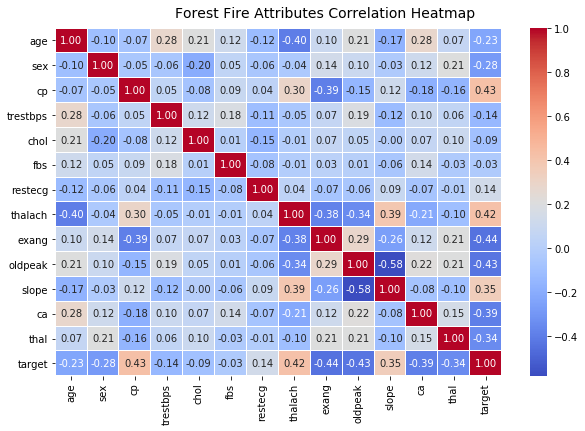

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 6))
data_corr = data.corr()
heatmap = sns.heatmap(round(data_corr,2),annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Forest Fire Attributes Correlation Heatmap', fontsize=14)

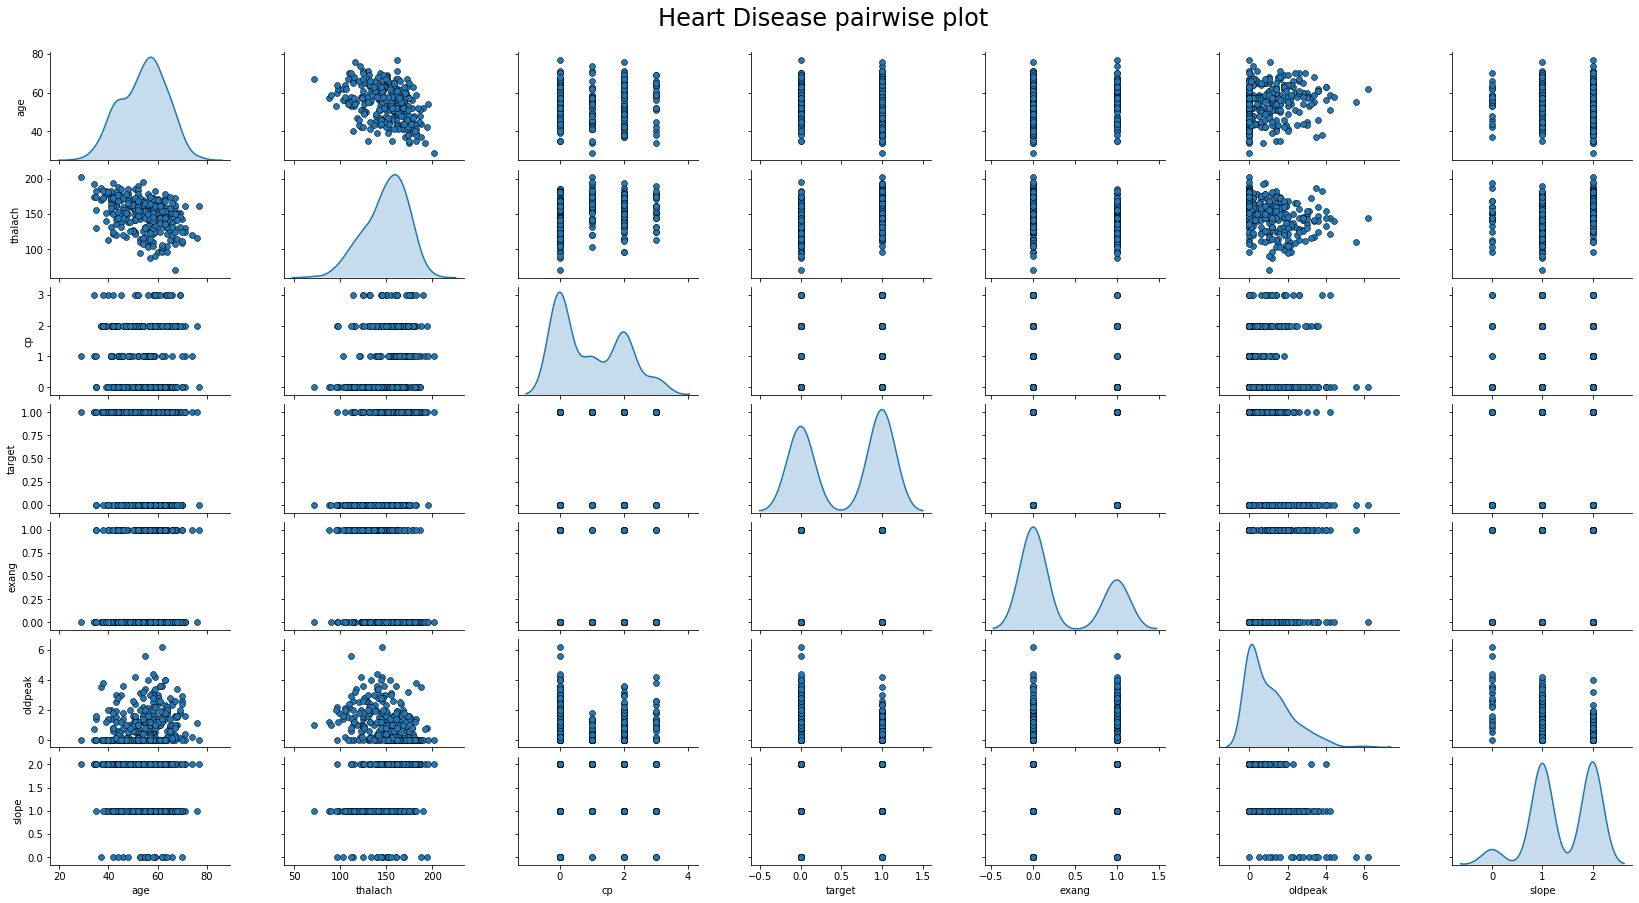

In [5]:
cols = ['age','thalach','cp','target','exang','oldpeak','slope']
pairplot = sns.pairplot(data[cols],height=1.8,aspect=1.8,plot_kws = dict(edgecolor='k',linewidth=0.5),diag_kind="kde",diag_kws=dict(shade=True))

fg=pairplot.fig
fg.subplots_adjust(top=0.93,wspace=0.3)
t= fg.suptitle('Heart Disease pairwise plot',fontsize=24)

In [6]:
#data for training
import numpy as np
labels = np.array(data['target'])

In [7]:
#data = data.drop(['Label'],axis=1)
data = data.drop(['target'],axis=1)
feature_list = list(data.columns)

features = np.array(data)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size=0.2,random_state=0)

In [9]:
X_train.shape

(242, 13)

In [10]:
X_test.shape

(61, 13)

In [11]:
Y_train.shape

(242,)

In [12]:
Y_test.shape

(61,)

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [14]:
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix,make_scorer

def tn(Y_test,y_pred): return confusion_matrix(Y_test,y_pred)[0,0]
def fp(Y_test,y_pred): return confusion_matrix(Y_test,y_pred)[0,1]
def fn(Y_test,y_pred): return confusion_matrix(Y_test,y_pred)[1,0]
def tp(Y_test,y_pred): return confusion_matrix(Y_test,y_pred)[1,1]
def tpr(Y_test,y_pred): 
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round((no_tp / (no_tp + no_fn)),2)

def tnr(Y_test,y_pred): 
    no_tn = confusion_matrix(Y_test,y_pred)[0,0]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
   
    return round((no_tn / (no_tn + no_fp)),2)

def fpr(Y_test,y_pred): 
    no_tn = confusion_matrix(Y_test,y_pred)[0,0]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    
    return round((no_fp / (no_tn + no_fp)),2)

def fnr(Y_test,y_pred): 
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round((no_fn / (no_tp + no_fn)),2)
def Recall(Y_test,y_pred):
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round((no_tp / (no_tp + no_fn)),2)
def Precision(Y_test,y_pred):
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    return round((no_tp / (no_tp + no_fp)),2)

def F1Score(Y_test,y_pred):
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round(((2*no_tp) / ((2*no_tp) + no_fp+no_fn)),2)

def Accuracy(Y_test,y_pred):
    no_tn = confusion_matrix(Y_test,y_pred)[0,0]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round(((no_tp + no_tn) / (no_tp + no_fp + no_fn + no_tn)),2)

def Error(Y_test,y_pred):
    no_tn = confusion_matrix(Y_test,y_pred)[0,0]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round(((no_fp + no_fn) / (no_tp + no_fp + no_fn + no_tn)),2)
def BACC(Y_test,y_pred):
    no_tn = confusion_matrix(Y_test,y_pred)[0,0]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round(0.5*((no_tp / (no_tp + no_fn))+(no_tn / (no_fp + no_tn))),2)

def TSS(Y_test,y_pred):
    no_tn = confusion_matrix(Y_test,y_pred)[0,0]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round((no_tp / (no_tp + no_fn))-(no_fp / (no_fp + no_tn)),2)

def HSS(Y_test,y_pred):
    no_tn = confusion_matrix(Y_test,y_pred)[0,0]
    no_fp = confusion_matrix(Y_test,y_pred)[0,1]
    no_tp = confusion_matrix(Y_test,y_pred)[1,1]
    no_fn = confusion_matrix(Y_test,y_pred)[1,0]
    return round((2*((no_tp * no_tn)-(no_fp * no_fn)))/(((no_tp + no_fn)*(no_fn + no_tn))+((no_tp + no_fp)*(no_fp + no_tn))),2)

    

#def tpr(ans_tp,ans_fn): return ans_tp/(ans_tp+ans_fn)
scoring = {'tp': make_scorer(tp),'tn': make_scorer(tn),'fp': make_scorer(fp),'fn': make_scorer(fn),'tpr': make_scorer(tpr),
           'tnr':make_scorer(tnr),'fpr':make_scorer(fpr),'fnr':make_scorer(fnr),'recall':make_scorer(Recall),
           'precision':make_scorer(Precision),'F1Score':make_scorer(F1Score),
           'Accuracy':make_scorer(Accuracy),'Error':make_scorer(Error),'BACC':make_scorer(BACC),'TSS':make_scorer(TSS),
           'HSS':make_scorer(HSS)}




In [15]:
cv = KFold(n_splits=10,random_state=1,shuffle=False)
scores = cross_validate(clf,X_train,Y_train,scoring = scoring,cv=cv)

In [16]:
print(scores)

{'fit_time': array([0.40879035, 0.41236281, 0.41114283, 0.40615439, 0.39446211,
       0.40615392, 0.40754223, 0.41098571, 0.39267087, 0.39692307]), 'score_time': array([0.12339854, 0.0369184 , 0.04686427, 0.04686975, 0.04833722,
       0.04686165, 0.04686284, 0.04834533, 0.06248546, 0.04686427]), 'test_tp': array([10,  9, 11, 12, 13, 12, 13, 14, 12, 10]), 'test_tn': array([ 9, 10,  7,  9,  9,  9,  8,  6, 10, 12]), 'test_fp': array([4, 4, 1, 3, 1, 1, 2, 2, 2, 2]), 'test_fn': array([2, 2, 5, 0, 1, 2, 1, 2, 0, 0]), 'test_tpr': array([0.83, 0.82, 0.69, 1.  , 0.93, 0.86, 0.93, 0.88, 1.  , 1.  ]), 'test_tnr': array([0.69, 0.71, 0.88, 0.75, 0.9 , 0.9 , 0.8 , 0.75, 0.83, 0.86]), 'test_fpr': array([0.31, 0.29, 0.12, 0.25, 0.1 , 0.1 , 0.2 , 0.25, 0.17, 0.14]), 'test_fnr': array([0.17, 0.18, 0.31, 0.  , 0.07, 0.14, 0.07, 0.12, 0.  , 0.  ]), 'test_recall': array([0.83, 0.82, 0.69, 1.  , 0.93, 0.86, 0.93, 0.88, 1.  , 1.  ]), 'test_precision': array([0.71, 0.69, 0.92, 0.8 , 0.93, 0.92, 0.87, 0.88, 

In [17]:
column = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Fold 6','Fold 7','Fold 8','Fold 9','Fold 10','Average']
row = ['TP','TN','FP','FN','TPR','TNR','FPR','FNR','Recall','Precision','F1 Score','Accuracy','Error','BACC','TSS','HSS']
 

data_rf = [value for value in scores.values()]
data_rf = data_rf[2:]


In [18]:
for i in range(len(data_rf)):
    avg = round(sum(data_rf[i])/len(data_rf[i]),2)
    temp = list(data_rf[i])
    temp.append(avg)
    data_rf[i]=temp
print(data_rf)    
    

[[10, 9, 11, 12, 13, 12, 13, 14, 12, 10, 11.6], [9, 10, 7, 9, 9, 9, 8, 6, 10, 12, 8.9], [4, 4, 1, 3, 1, 1, 2, 2, 2, 2, 2.2], [2, 2, 5, 0, 1, 2, 1, 2, 0, 0, 1.5], [0.83, 0.82, 0.69, 1.0, 0.93, 0.86, 0.93, 0.88, 1.0, 1.0, 0.89], [0.69, 0.71, 0.88, 0.75, 0.9, 0.9, 0.8, 0.75, 0.83, 0.86, 0.81], [0.31, 0.29, 0.12, 0.25, 0.1, 0.1, 0.2, 0.25, 0.17, 0.14, 0.19], [0.17, 0.18, 0.31, 0.0, 0.07, 0.14, 0.07, 0.12, 0.0, 0.0, 0.11], [0.83, 0.82, 0.69, 1.0, 0.93, 0.86, 0.93, 0.88, 1.0, 1.0, 0.89], [0.71, 0.69, 0.92, 0.8, 0.93, 0.92, 0.87, 0.88, 0.86, 0.83, 0.84], [0.77, 0.75, 0.79, 0.89, 0.93, 0.89, 0.9, 0.88, 0.92, 0.91, 0.86], [0.76, 0.76, 0.75, 0.88, 0.92, 0.88, 0.88, 0.83, 0.92, 0.92, 0.85], [0.24, 0.24, 0.25, 0.12, 0.08, 0.12, 0.12, 0.17, 0.08, 0.08, 0.15], [0.76, 0.77, 0.78, 0.88, 0.91, 0.88, 0.86, 0.81, 0.92, 0.93, 0.85], [0.53, 0.53, 0.56, 0.75, 0.83, 0.76, 0.73, 0.62, 0.83, 0.86, 0.7], [0.52, 0.52, 0.5, 0.75, 0.83, 0.75, 0.74, 0.62, 0.83, 0.83, 0.69]]


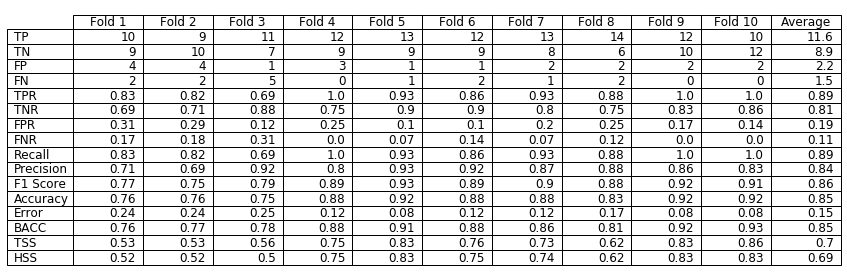

In [19]:
fig,ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

the_table=ax.table(cellText=data_rf, rowLabels=row, colLabels=column,loc='center',colWidths=[0.17 for x in column])
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
fig.tight_layout()
plt.show()
#plt.subplots_adjust(left=0.2,top=0.8)

In [20]:
from sklearn.model_selection import RepeatedKFold,cross_val_score
repeatedcv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
Scores_RKF = cross_val_score(clf,X_train,Y_train,scoring='accuracy',cv=repeatedcv,n_jobs=-1)
print('Accuracy: %.3f (%.3f)'%(np.mean(Scores_RKF),np.std(Scores_RKF)))

Accuracy: 0.825 (0.077)


In [21]:
feature_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
feature_imp = pd.Series(clf.feature_importances_,index=feature_names)


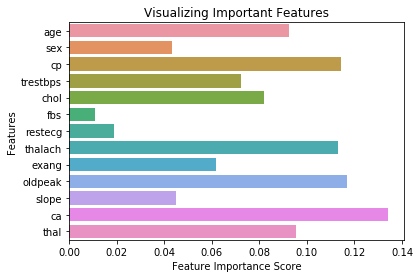

In [22]:
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf_svm = make_pipeline(StandardScaler(),SVC(kernel = 'sigmoid',gamma='auto',verbose=True))
clf_svm.fit(X_train,Y_train)

[LibSVM]

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='sigmoid', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=True))],
         verbose=False)

In [24]:
y_pred_svm = clf_svm.predict(X_test)
print(y_pred_svm)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [25]:
tp(Y_test,y_pred_svm)
tn(Y_test,y_pred_svm)
fp(Y_test,y_pred_svm)
fn(Y_test,y_pred_svm)
tpr(Y_test,y_pred_svm)
tnr(Y_test,y_pred_svm)
fpr(Y_test,y_pred_svm)
fnr(Y_test,y_pred_svm)
Recall(Y_test,y_pred_svm)
Precision(Y_test,y_pred_svm)
F1Score(Y_test,y_pred_svm)
Accuracy(Y_test,y_pred_svm)
Error(Y_test,y_pred_svm)
BACC(Y_test,y_pred_svm)
TSS(Y_test,y_pred_svm)
HSS(Y_test,y_pred_svm)

0.66

In [26]:
cv = KFold(n_splits=10,random_state=1,shuffle=False)
scores_svm = cross_validate(clf_svm,X_train,Y_train,scoring = scoring,cv=cv)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [27]:
print(scores_svm)

{'fit_time': array([0.01175547, 0.00402474, 0.00507689, 0.00492001, 0.        ,
       0.00813341, 0.        , 0.00103951, 0.00506544, 0.00103211]), 'score_time': array([0.02073121, 0.02153134, 0.02157044, 0.02657199, 0.02835655,
       0.02503681, 0.02891469, 0.02073216, 0.02227473, 0.02608228]), 'test_tp': array([ 9,  9, 13, 12, 14, 12, 13, 13, 10, 10]), 'test_tn': array([ 8, 11,  5,  7,  8,  7,  9,  7,  6, 12]), 'test_fp': array([5, 3, 3, 5, 2, 3, 1, 1, 6, 2]), 'test_fn': array([3, 2, 3, 0, 0, 2, 1, 3, 2, 0]), 'test_tpr': array([0.75, 0.82, 0.81, 1.  , 1.  , 0.86, 0.93, 0.81, 0.83, 1.  ]), 'test_tnr': array([0.62, 0.79, 0.62, 0.58, 0.8 , 0.7 , 0.9 , 0.88, 0.5 , 0.86]), 'test_fpr': array([0.38, 0.21, 0.38, 0.42, 0.2 , 0.3 , 0.1 , 0.12, 0.5 , 0.14]), 'test_fnr': array([0.25, 0.18, 0.19, 0.  , 0.  , 0.14, 0.07, 0.19, 0.17, 0.  ]), 'test_recall': array([0.75, 0.82, 0.81, 1.  , 1.  , 0.86, 0.93, 0.81, 0.83, 1.  ]), 'test_precision': array([0.64, 0.75, 0.81, 0.71, 0.88, 0.8 , 0.93, 0.93, 

In [28]:
data_svm = [value for value in scores_svm.values()]
data_svm = data_svm[2:]

In [29]:
print(data_svm)

[array([ 9,  9, 13, 12, 14, 12, 13, 13, 10, 10]), array([ 8, 11,  5,  7,  8,  7,  9,  7,  6, 12]), array([5, 3, 3, 5, 2, 3, 1, 1, 6, 2]), array([3, 2, 3, 0, 0, 2, 1, 3, 2, 0]), array([0.75, 0.82, 0.81, 1.  , 1.  , 0.86, 0.93, 0.81, 0.83, 1.  ]), array([0.62, 0.79, 0.62, 0.58, 0.8 , 0.7 , 0.9 , 0.88, 0.5 , 0.86]), array([0.38, 0.21, 0.38, 0.42, 0.2 , 0.3 , 0.1 , 0.12, 0.5 , 0.14]), array([0.25, 0.18, 0.19, 0.  , 0.  , 0.14, 0.07, 0.19, 0.17, 0.  ]), array([0.75, 0.82, 0.81, 1.  , 1.  , 0.86, 0.93, 0.81, 0.83, 1.  ]), array([0.64, 0.75, 0.81, 0.71, 0.88, 0.8 , 0.93, 0.93, 0.62, 0.83]), array([0.69, 0.78, 0.81, 0.83, 0.93, 0.83, 0.93, 0.87, 0.71, 0.91]), array([0.68, 0.8 , 0.75, 0.79, 0.92, 0.79, 0.92, 0.83, 0.67, 0.92]), array([0.32, 0.2 , 0.25, 0.21, 0.08, 0.21, 0.08, 0.17, 0.33, 0.08]), array([0.68, 0.8 , 0.72, 0.79, 0.9 , 0.78, 0.91, 0.84, 0.67, 0.93]), array([0.37, 0.6 , 0.44, 0.58, 0.8 , 0.56, 0.83, 0.69, 0.33, 0.86]), array([0.36, 0.6 , 0.44, 0.58, 0.82, 0.57, 0.83, 0.65, 0.33, 0.8

In [30]:
for i in range(len(data_svm)):
    avg = round(sum(data_svm[i])/len(data_svm[i]),2)
    temp = list(data_svm[i])
    temp.append(avg)
    data_svm[i]=temp
print(data_svm)    
    

[[9, 9, 13, 12, 14, 12, 13, 13, 10, 10, 11.5], [8, 11, 5, 7, 8, 7, 9, 7, 6, 12, 8.0], [5, 3, 3, 5, 2, 3, 1, 1, 6, 2, 3.1], [3, 2, 3, 0, 0, 2, 1, 3, 2, 0, 1.6], [0.75, 0.82, 0.81, 1.0, 1.0, 0.86, 0.93, 0.81, 0.83, 1.0, 0.88], [0.62, 0.79, 0.62, 0.58, 0.8, 0.7, 0.9, 0.88, 0.5, 0.86, 0.73], [0.38, 0.21, 0.38, 0.42, 0.2, 0.3, 0.1, 0.12, 0.5, 0.14, 0.28], [0.25, 0.18, 0.19, 0.0, 0.0, 0.14, 0.07, 0.19, 0.17, 0.0, 0.12], [0.75, 0.82, 0.81, 1.0, 1.0, 0.86, 0.93, 0.81, 0.83, 1.0, 0.88], [0.64, 0.75, 0.81, 0.71, 0.88, 0.8, 0.93, 0.93, 0.62, 0.83, 0.79], [0.69, 0.78, 0.81, 0.83, 0.93, 0.83, 0.93, 0.87, 0.71, 0.91, 0.83], [0.68, 0.8, 0.75, 0.79, 0.92, 0.79, 0.92, 0.83, 0.67, 0.92, 0.81], [0.32, 0.2, 0.25, 0.21, 0.08, 0.21, 0.08, 0.17, 0.33, 0.08, 0.19], [0.68, 0.8, 0.72, 0.79, 0.9, 0.78, 0.91, 0.84, 0.67, 0.93, 0.8], [0.37, 0.6, 0.44, 0.58, 0.8, 0.56, 0.83, 0.69, 0.33, 0.86, 0.61], [0.36, 0.6, 0.44, 0.58, 0.82, 0.57, 0.83, 0.65, 0.33, 0.83, 0.6]]


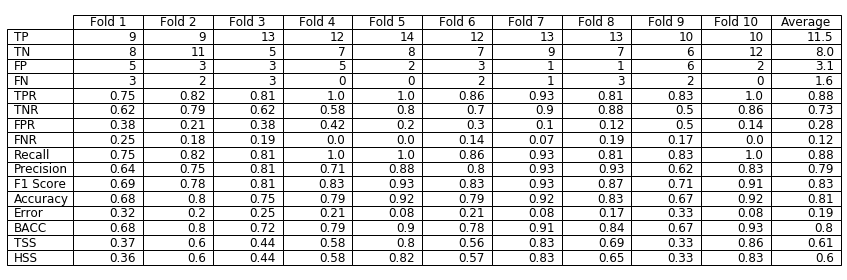

In [31]:
fig2,ax2 = plt.subplots()

# hide axes
fig2.patch.set_visible(False)
ax2.axis('off')
ax2.axis('tight')

the_table2=ax2.table(cellText=data_svm, rowLabels=row, colLabels=column,loc='center',colWidths=[0.17 for x in column])
the_table2.auto_set_font_size(False)
the_table2.set_fontsize(12)
fig2.tight_layout()
plt.show()

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=3)
clf_KNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [33]:
y_pred_knn = clf_KNN.predict(X_test)
print(y_pred_knn)

[0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0]


In [34]:
tp(Y_test,y_pred_knn)
tn(Y_test,y_pred_knn)
fp(Y_test,y_pred_knn)
fn(Y_test,y_pred_knn)
tpr(Y_test,y_pred_knn)
tnr(Y_test,y_pred_knn)
fpr(Y_test,y_pred_knn)
fnr(Y_test,y_pred_knn)
Recall(Y_test,y_pred_knn)
Precision(Y_test,y_pred_knn)
F1Score(Y_test,y_pred_knn)
Accuracy(Y_test,y_pred_knn)
Error(Y_test,y_pred_knn)
BACC(Y_test,y_pred_knn)
TSS(Y_test,y_pred_knn)
HSS(Y_test,y_pred_knn)

0.27

In [35]:
scores_knn = cross_validate(clf_KNN,X_train,Y_train,scoring = scoring,cv=cv)
print(scores_knn)

{'fit_time': array([0.00694251, 0.        , 0.        , 0.00099707, 0.        ,
       0.00103378, 0.        , 0.01562428, 0.        , 0.        ]), 'score_time': array([0.02683973, 0.02445197, 0.02437067, 0.02453232, 0.02611732,
       0.02469516, 0.0157578 , 0.01561618, 0.03124571, 0.03350639]), 'test_tp': array([10,  8,  7,  9,  8,  4, 10, 11,  8,  8]), 'test_tn': array([ 8, 11,  3,  6,  6,  3,  8,  5,  6,  7]), 'test_fp': array([5, 3, 5, 6, 4, 7, 2, 3, 6, 7]), 'test_fn': array([ 2,  3,  9,  3,  6, 10,  4,  5,  4,  2]), 'test_tpr': array([0.83, 0.73, 0.44, 0.75, 0.57, 0.29, 0.71, 0.69, 0.67, 0.8 ]), 'test_tnr': array([0.62, 0.79, 0.38, 0.5 , 0.6 , 0.3 , 0.8 , 0.62, 0.5 , 0.5 ]), 'test_fpr': array([0.38, 0.21, 0.62, 0.5 , 0.4 , 0.7 , 0.2 , 0.38, 0.5 , 0.5 ]), 'test_fnr': array([0.17, 0.27, 0.56, 0.25, 0.43, 0.71, 0.29, 0.31, 0.33, 0.2 ]), 'test_recall': array([0.83, 0.73, 0.44, 0.75, 0.57, 0.29, 0.71, 0.69, 0.67, 0.8 ]), 'test_precision': array([0.67, 0.73, 0.58, 0.6 , 0.67, 0.36, 0.

In [36]:
data_knn = [value for value in scores_knn.values()]
data_knn = data_knn[2:]

In [37]:
for i in range(len(data_knn)):
    avg = round(sum(data_knn[i])/len(data_knn[i]),2)
    temp = list(data_knn[i])
    temp.append(avg)
    data_knn[i]=temp

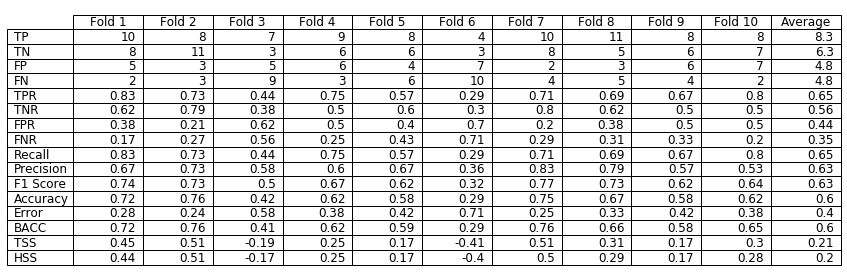

In [38]:
fig3,ax3 = plt.subplots()

# hide axes
fig3.patch.set_visible(False)
ax3.axis('off')
ax3.axis('tight')

the_table3=ax3.table(cellText=data_knn, rowLabels=row, colLabels=column,loc='center',colWidths=[0.17 for x in column])
the_table3.auto_set_font_size(False)
the_table3.set_fontsize(12)
fig3.tight_layout()
plt.show()

In [39]:
RF_ACC=scores['test_Accuracy']
avg_rf_acc = sum(RF_ACC)/len(RF_ACC)


In [40]:
SVM_ACC=scores_svm['test_Accuracy']
avg_svm_acc = sum(SVM_ACC)/len(SVM_ACC)

In [41]:
KNN_ACC=scores_knn['test_Accuracy']
avg_knn_acc= sum(KNN_ACC)/len(KNN_ACC)

Text(0.5, 1.1, 'Accuracy Comparision of three classifiers on Heart Disease dataset')

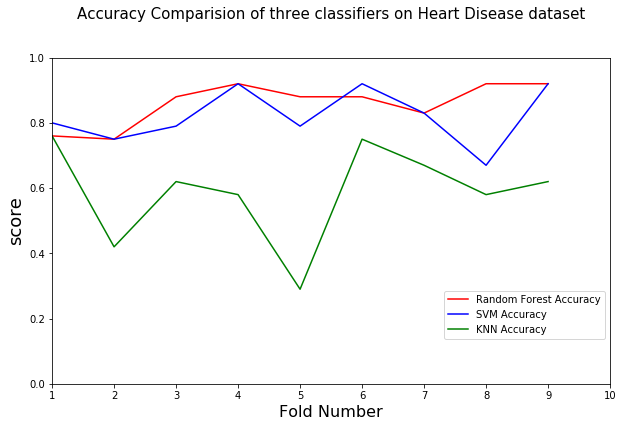

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
#sd=plt.subplot(211)
random_forest,=plt.plot(RF_ACC,color='r')
svm,=plt.plot(SVM_ACC,color='b')
knn,=plt.plot(KNN_ACC,color='g')
ax.set_xlim([1,10])
ax.set_ylim([0,1])
plt.ylabel("score", fontsize="18")
plt.xlabel("Fold Number",fontsize='16')
plt.legend([random_forest,svm,knn],
           ["Random Forest Accuracy", "SVM Accuracy","KNN Accuracy"],
           bbox_to_anchor=(0, .3, 1, 0))
plt.title("Accuracy Comparision of three classifiers on Heart Disease dataset",
          x=.5, y=1.1, fontsize="15")

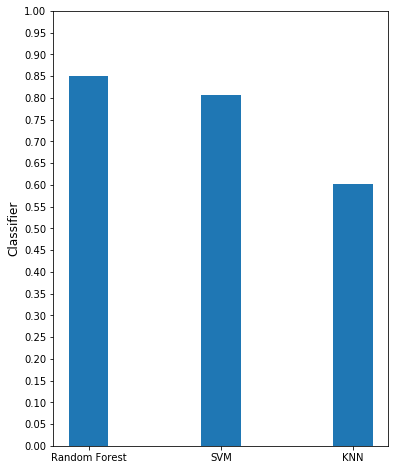

In [43]:
fig, ax = plt.subplots(figsize=(6, 8))
plt.bar(["Random Forest","SVM","KNN"],[avg_rf_acc,avg_svm_acc,avg_knn_acc],width=[0.3]) 
plt.ylabel("Average Accuracy Score",fontsize='12')
plt.ylabel("Classifier",fontsize='12')
plt.yticks(np.arange(0, 1.01,0.05))
plt.show()

In [44]:
def Choose_best_of_three(RF,Svm,Knn):
    
    best = max(RF,Svm,Knn)
    
    if best == RF:
        return "Random Forest is best among all classifiers with accuracy of %.3f"%RF
    elif best == Svm:
        return "SVM with kernel Sigmoid is best among all classifiers with accuracy of %.3f"%Svm
    else:
        return "Knn is best among all classifiers with accuracy of %.3f"%Knn
    

In [45]:
Choose_best_of_three(avg_rf_acc,avg_svm_acc,avg_knn_acc)

'Random Forest is best among all classifiers with accuracy of 0.850'